# Assignment-2

## 1. Importing required package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

## 2. Loading the dataset

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 3. Visualization

### 3.1 Univariate Analysis

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 10 Patch objects>)

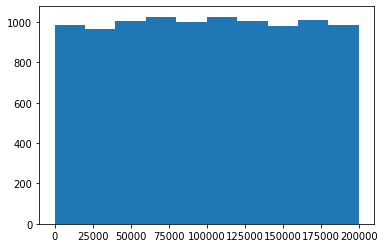

In [4]:
plt.hist(df["EstimatedSalary"])

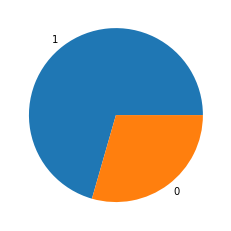

In [5]:
plt.pie(df["HasCrCard"].value_counts(), labels = df["HasCrCard"].unique())
plt.show()

### 3.2 Bi-Variate Analysis

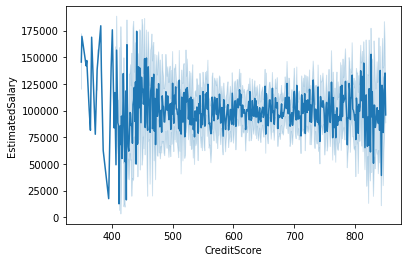

In [6]:
sns.lineplot(x=df.CreditScore, y=df.EstimatedSalary)

<BarContainer object of 10000 artists>

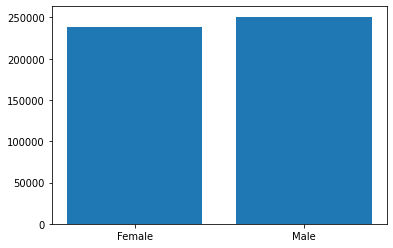

In [7]:
plt.bar(df.Gender, df.Balance)

### 3.3 Multi-Variate Analysis 

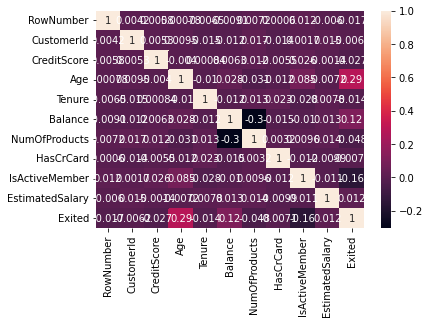

In [8]:
sns.heatmap(df.corr(),annot=True)

## 4. Perform descriptive statistics on the dataset

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle missing values

In [10]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## 6. Find the outliers and replace the outliers

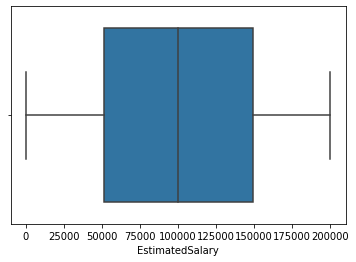

In [11]:
sns.boxplot(x=df["EstimatedSalary"])

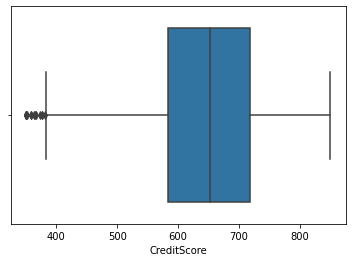

In [12]:
sns.boxplot(x=df["CreditScore"])

In [13]:
q1 = df.CreditScore.quantile(0.25)
q2 = df.CreditScore.quantile(0.75)
IQR = q2 - q1
upper_limit = q2 + 1.5 * IQR
lower_limit = q2 - 1.5 * IQR
print(upper_limit)
print(lower_limit)
df["CreditScore"].head()

919.0
517.0


0    619
1    608
2    502
3    699
4    850
Name: CreditScore, dtype: int64

In [14]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [15]:
df["CreditScore"] = np.where(df["CreditScore"]<lower_limit,6.52,df["CreditScore"])

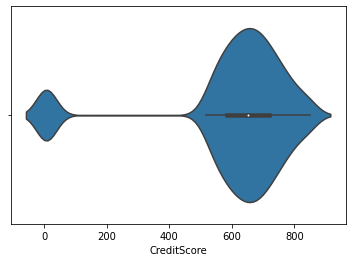

In [16]:
df["CreditScore"] = np.where(df["CreditScore"]<lower_limit,6.52,df["CreditScore"])
sns.violinplot(x=df["CreditScore"])

## 7. Check for categorical columns and perform encoding

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.00,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.00,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,6.52,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.00,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.00,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
le = LabelEncoder()
df.Geography = le.fit_transform(df.Geography)
df.Gender = le.fit_transform(df.Gender)
df.Surname = le.fit_transform(df.Surname)

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619.00,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608.00,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,6.52,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699.00,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850.00,2,0,43,2,125510.82,1,1,1,79084.10,0


## 8. Split the data

In [20]:
y = df["EstimatedSalary"]
X = df.drop("EstimatedSalary",axis=1)

In [21]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [22]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,1115,619.00,0,0,42,2,0.00,1,1,1,1
1,2,15647311,1177,608.00,2,0,41,1,83807.86,1,0,1,0
2,3,15619304,2040,6.52,0,0,42,8,159660.80,3,1,0,1
3,4,15701354,289,699.00,0,0,39,1,0.00,2,0,0,0
4,5,15737888,1822,850.00,2,0,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771.00,0,1,39,5,0.00,2,1,0,0
9996,9997,15569892,1336,6.52,0,1,35,10,57369.61,1,1,1,0
9997,9998,15584532,1570,709.00,0,0,36,7,0.00,1,0,1,1
9998,9999,15682355,2345,772.00,1,1,42,3,75075.31,2,1,0,1


## 9. Scale the independent variables

In [23]:
scaled_X = pd.DataFrame(scale(X),columns=X.columns)
scaled_X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,-1.731878,-0.783213,-0.464183,0.054524,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165
1,-1.731531,-0.606534,-0.390911,0.001087,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775
2,-1.731185,-0.995885,0.628988,-2.920872,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165
3,-1.730838,0.144767,-1.440356,0.443160,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775
4,-1.730492,0.652659,0.371354,1.176710,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,0.580534,0.792932,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.505775
9996,1.730838,-1.682806,-0.203004,-2.920872,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,-0.505775
9997,1.731185,-1.479282,0.073539,0.491740,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,1.977165
9998,1.731531,-0.119356,0.989439,0.797790,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,1.977165


## 10. Split the data into training and testing

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_X, y, test_size=0.3, random_state=0)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)


(7000, 13) (3000, 13) (7000,) (3000,)


In [25]:
Xtrain

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
7681,0.928899,-0.797032,-1.475810,0.161399,-0.901886,0.912419,-0.564665,-1.041760,1.117213,0.807737,0.646092,0.970243,1.977165
9031,1.396553,0.714314,-1.588081,-0.324396,-0.901886,0.912419,0.007457,0.687130,-1.225848,0.807737,0.646092,-1.030670,-0.505775
3691,-0.453278,0.963450,-0.240822,-0.086356,-0.901886,-1.095988,3.535540,-0.004426,1.354191,-0.911583,-1.547768,0.970243,-0.505775
202,-1.661903,-1.250707,-0.427547,-2.920872,1.515067,0.912419,1.056346,-0.004426,-1.225848,-0.911583,-1.547768,0.970243,1.977165
5625,0.216680,-0.385174,-1.478173,-2.920872,-0.901886,-1.095988,2.009882,0.687130,1.070229,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.463756,-1.473777,1.385344,-0.066924,0.306591,-1.095988,-0.660018,-0.350204,0.698607,0.807737,0.646092,0.970243,-0.505775
4859,-0.048671,-0.609314,1.530707,0.904665,1.515067,-1.095988,-1.613554,-0.350204,0.608299,-0.911583,0.646092,0.970243,-0.505775
3264,-0.601195,-1.620525,-0.361366,0.632620,-0.901886,0.912419,-0.373958,-0.004426,1.358909,0.807737,0.646092,-1.030670,-0.505775
9845,1.678530,-0.374039,0.725896,-0.086356,1.515067,-1.095988,-0.087897,1.378686,-1.225848,0.807737,0.646092,0.970243,-0.505775


In [26]:
ytrain

7681     55796.83
9031     19823.02
3691     13848.58
202     146145.93
5625    129562.74
          ...    
9225    162961.79
4859    107753.07
3264    181429.87
9845    148750.16
2732    118855.26
Name: EstimatedSalary, Length: 7000, dtype: float64

In [27]:
Xtest

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9394,1.522299,-1.045250,1.398344,-0.052351,0.306591,-1.095988,-0.373958,1.032908,0.875323,-0.911583,0.646092,0.970243,-0.505775
898,-1.420801,-0.503813,-0.782089,-0.411839,-0.901886,-1.095988,0.102810,-1.041760,0.424422,-0.911583,0.646092,-1.030670,1.977165
2398,-0.901186,-0.793292,0.412717,0.477166,1.515067,-1.095988,0.293517,1.032908,0.302927,-0.911583,0.646092,0.970243,-0.505775
5906,0.314021,0.760190,1.590979,0.875518,-0.901886,0.912419,-0.660018,-0.350204,0.570464,-0.911583,-1.547768,-1.030670,-0.505775
2343,-0.920239,1.042107,-0.603636,0.477166,0.306591,0.912419,-0.087897,-0.004426,1.387129,0.807737,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,-0.344851,0.661806,-0.626091,-0.377833,1.515067,-1.095988,0.198164,-0.350204,-1.225848,0.807737,-1.547768,0.970243,-0.505775
7375,0.822897,-0.723866,-1.266630,0.151683,-0.901886,0.912419,3.630893,0.341352,0.071162,0.807737,0.646092,0.970243,-0.505775
9307,1.492162,-0.146464,0.686897,0.375149,-0.901886,0.912419,0.102810,-1.041760,1.466728,0.807737,0.646092,0.970243,-0.505775
8394,1.175889,-1.292287,-1.384811,0.409155,-0.901886,0.912419,2.868064,1.724464,1.257616,-0.911583,0.646092,0.970243,-0.505775


In [28]:
ytest

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
4004    147606.71
7375     55829.25
9307    167400.29
8394     70849.47
5233     33759.41
Name: EstimatedSalary, Length: 3000, dtype: float64